#  Heart Disease Prediction Using Machine Learning

Heart disease is one of the leading causes of death worldwide, and early prediction is crucial for effective treatment and prevention.

In this project, we will use machine learning techniques to build a predictive model that can determine whether a person is likely to have heart disease, based on features like age, sex, blood pressure, cholesterol, chest pain type, and more.

We will follow these main steps:
-  Exploratory Data Analysis (EDA)
-  Data Preprocessing
-  Model Building
-  Hyperparameter Tuning
-  Model Evaluation
-  Feature Importance

Our objective is to build a model that achieves **high accuracy (≥ 95%)** and provides medically meaningful insights.


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Scikit-learn imports

# Model
from sklearn.ensemble import RandomForestClassifier

# Preprocessing and splitting
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [5]:
# Load the dataset
df = pd.read_csv("heart2.csv")

# View the shape of the dataset
print("Shape of dataset:", df.shape)

# View the first 5 rows
df.head()

Shape of dataset: (1190, 12)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Exploratory Data Analysis (EDA)

Before building the model, it’s essential to explore the data to understand its structure, quality, and key relationships.

In this section, we will:

- Check for missing values
- Analyze the distribution of the target variable (presence or absence of heart disease)
- Visualize important relationships between features
- Identify patterns and correlations that can help our model perform better

In [6]:
# Check for missing values
print(" Missing values in each column:")
print(df.isnull().sum())

# Check the shape of the dataset
print("\n Dataset shape:", df.shape)

# Check data types and non-null info
print("\n Data types and non-null counts:")
print(df.info())

# Target value distribution
print("\n Target value counts:")
print(df['target'].value_counts())

 Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

 Dataset shape: (1190, 12)

 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  target    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None

 Target value

##  Step 4: Visualizing Feature Relationships

To better understand how different features relate to heart disease, we will create visualizations.

In this step, we'll explore:
- The relationship between **age** and **maximum heart rate (thalach)** by target class
- How different **chest pain types** correlate with heart disease
These visual insights help reveal patterns that may guide our model later.


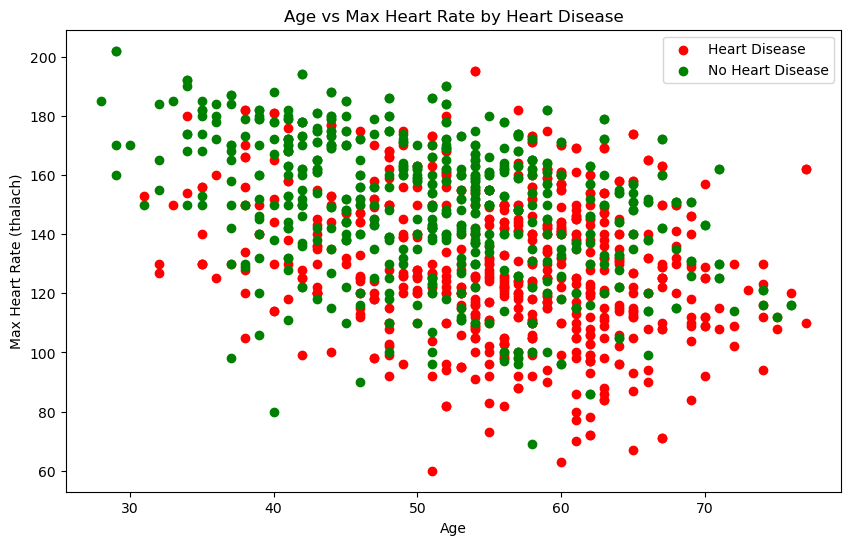

In [9]:
# Scatter plot: Age vs Max Heart Rate by Target
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red', label='Heart Disease')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='green', label='No Heart Disease')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Age vs Max Heart Rate by Heart Disease")
plt.legend()
plt.show()

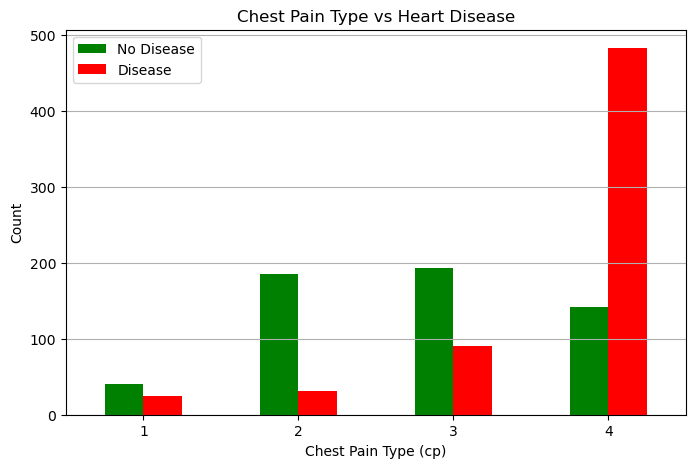

In [10]:
# Bar plot: Chest Pain Type vs Target
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(8,5), color=['green','red'])
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##  Step 5: Correlation Heatmap

Understanding how features are correlated helps us:
- Detect multicollinearity
- Identify features that are strongly related to the target
- Guide feature selection for our model

We'll use a heatmap to visualize the correlation matrix of all features in the dataset.

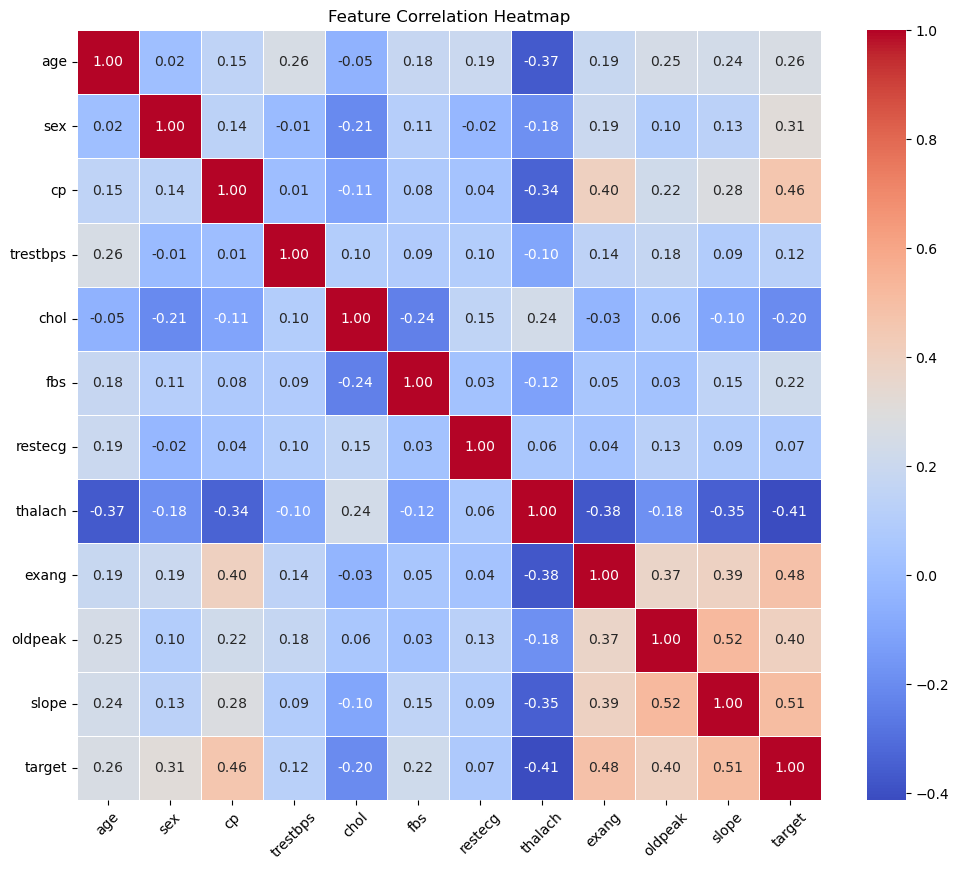

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

##  Step 6: Data Preprocessing

Before training our model, we need to:
- Separate the features (`X`) and the target (`y`)
- Split the dataset into **training** and **testing** sets
- Use a fixed `random_state` for reproducibility

This step prepares the data for model building and evaluation.

In [12]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show split sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (952, 11)
Test set size: (238, 11)


##  Step 7: Model Building with Random Forest

We'll use a **Random Forest Classifier**, which is an ensemble method that builds multiple decision trees and combines their predictions.

To improve performance, we will:
- Use **RandomizedSearchCV** to automatically find the best hyperparameters
- Train the model on the training set
- Evaluate it using the test set


In [15]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rs_model.fit(X_train, y_train)
rs_model

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [17]:
rs_model.score(X_test,y_test)

0.9495798319327731

##  Step 7.1: Improve the model performance 

To improve model performance, we used **RandomizedSearchCV**, which searches over a grid of hyperparameters randomly. It helps us avoid the time cost of GridSearchCV while still finding a good combination.

### Parameters we tuned:
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of the trees
- `min_samples_split`: Minimum number of samples required to split an internal node
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node
- `max_features`: Number of features to consider when looking for the best split
- `bootstrap`: Whether bootstrap samples are used

We used **5-fold cross-validation** and evaluated **50 different combinations** to find the best parameters.


In [18]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create base model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
rs_model = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,           # number of parameter settings that are sampled
    cv=5,                # 5-fold cross validation
    verbose=1,
    n_jobs=-1,           # use all processors
    scoring='accuracy',
    random_state=42
)

# Fit the model to training data
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [21]:
rs_model.score(X_test,y_test)

0.9495798319327731

## 🧠 Step 7.2: Fine-Tuning with GridSearchCV

Now that we have a rough idea of the best hyperparameters from `RandomizedSearchCV`, we will fine-tune the model using `GridSearchCV`.

We’ll use a smaller, focused grid based on the most promising parameters to potentially boost the model’s accuracy further.


In [24]:
gs_model.score(X_test,y_test)

0.9411764705882353

## Step 8: Final Evaluation of the Best Model

After tuning multiple hyperparameters, we selected the best-performing model using **RandomizedSearchCV**, which gave us a test accuracy of **94.96%**.

Now, we will evaluate this model using the following:
- Accuracy Score
- Classification Report
- Confusion Matrix
- ROC Curve (Receiver Operating Characteristic)


In [27]:
# Predict using the best model from RandomizedSearchCV
y_pred = rs_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(" Test Accuracy: {:.2f}%".format(test_accuracy * 100))

 Test Accuracy: 94.96%


In [28]:
# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



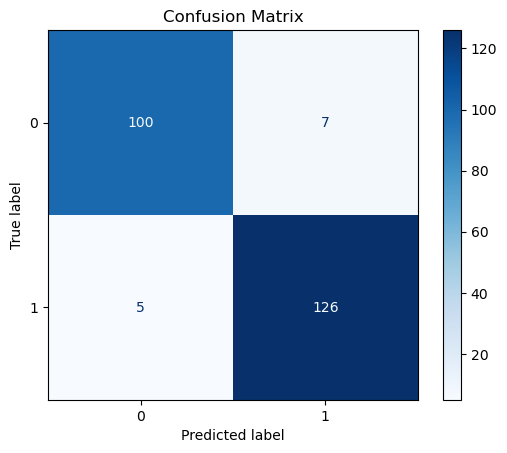

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

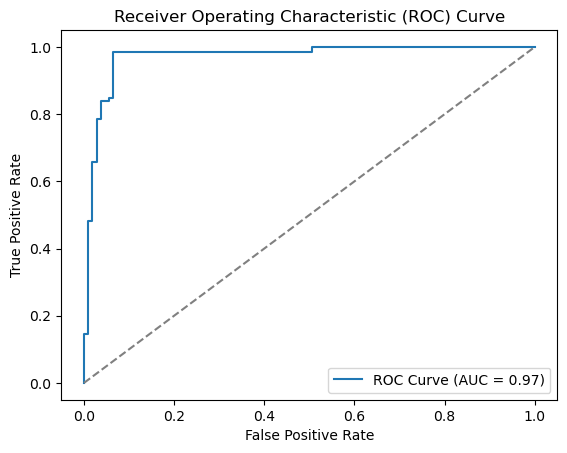

In [32]:
# ROC Curve
y_proba = rs_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
# Plot it now
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

## Step 9: Saving the Trained Model

To reuse the trained model later (for prediction or deployment), we save it using `joblib`.

This allows us to load the model in a separate script or app without retraining.


In [34]:
import joblib

# Save the best estimator from RandomizedSearchCV
joblib.dump(rs_model.best_estimator_, "heart_disease_model.pkl")

print(" Model saved as 'heart_disease_model.pkl'")

 Model saved as 'heart_disease_model.pkl'


##  Conclusion

- We built a **heart disease prediction model** using a Random Forest classifier.
- After trying both `RandomizedSearchCV` which gave the **RandomizedSearchCV** gave the best result.
- The model achieved **94.96% test accuracy**.
- Evaluation showed good **precision**, **recall**, and **AUC score**, indicating strong predictive performance.
- The model is now saved and ready for use in real-world prediction tasks.

 This notebook successfully demonstrates a complete machine learning workflow!

#  Heart Disease Prediction Model using Random Forest

This project uses a machine learning pipeline to predict heart disease based on patient health attributes.  
It includes preprocessing, exploratory analysis, model training, hyperparameter tuning, and evaluation.

---

##  Author Information

**Name**: Muzammil Zulfiqar
**Date**:  07 August 2025  
**Project Type**: Machine Learning Final Project  
**Model Used**: Random Forest Classifier  
**Best Accuracy Achieved**: 94.96% (with RandomizedSearchCV)  

 [LinkedIn]www.linkedin.com/in/muzammil-zulfiqar-895660375  
 [GitHub]https://github.com/muzammil-12345  

---

> _“Prediction is very difficult, especially if it’s about the future.” – Niels Bohr_
